In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/label_expw.csv'

# Load correctly by treating quoted parts as a single field
df = pd.read_csv(csv_path, header=None, quotechar='"')

# Check structure
print(df.head())
print(df.shape)


                          0               1   2   3   4   5   6   7   8   9   \
0  awe_grandmother_214_0.png  (0, 0, 48, 48)   0   0   0   0   0   0  10   0   
1        mad_woman_303_0.png  (0, 0, 48, 48)   0   0   0   0   0   0  10   0   
2  fierce_european_896_0.png  (0, 0, 48, 48)   0   0   0   0   0   0  10   0   
3   annoyed_father_453_0.png  (0, 0, 48, 48)   0   0   0   0   0   0  10   0   
4       mad_infant_734_0.png  (0, 0, 48, 48)   0   0   0   0   0   0  10   0   

   10  11  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  
(84830, 12)


In [ ]:
df.columns = ['image', 'bbox', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']



In [ ]:
emotion_columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
df['label'] = df[emotion_columns].astype(int).idxmax(axis=1).astype(int)

# Preview to confirm
df[['image', 'label']].head()


,image,label
0,awe_grandmother_214_0.png,6
1,mad_woman_303_0.png,6
2,fierce_european_896_0.png,6
3,annoyed_father_453_0.png,6
4,mad_infant_734_0.png,6


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

image_dir = '/content/ExpwCleaned/ExpwCleaned'  # adjust if different

image_size = 48  # or use 64
X = []
y = []

for idx, row in df.iterrows():
    img_path = os.path.join(image_dir, row['image'])

    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (image_size, image_size))+
        X.append(img)
        y.append(row['label'])

X = np.array(X).reshape(-1, image_size, image_size, 1) / 255.0  # Normalize
y = to_categorical(y, num_classes=10)  # One-hot encoding


In [ ]:
!unzip -q "/content/drive/MyDrive/Copy of ExpwCleaned.zip" -d "/content/ExpwCleaned"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(48, 48, 1)),  # This is the preferred way
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,434 (3.20 MB)

 Trainable params: 839,434 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3944 - loss: 1.5487 - val_accuracy: 0.5190 - val_loss: 1.3119
Epoch 2/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5187 - loss: 1.3206 - val_accuracy: 0.5458 - val_loss: 1.2414
Epoch 3/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5477 - loss: 1.2542 - val_accuracy: 0.5579 - val_loss: 1.2086
Epoch 4/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5655 - loss: 1.2002 - val_accuracy: 0.5658 - val_loss: 1.1904
Epoch 5/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5811 - loss: 1.1559 - val_accuracy: 0.5792 - val_loss: 1.1616
Epoch 6/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5889 - loss: 1.1376 - val_accuracy: 0.5849 - val_loss: 1.1479
Epoch 7/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6035 - loss: 1.0975 - val_accuracy: 0.5893 - val_loss: 1.1411
Epoch 8/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6090 - loss: 1.0725 

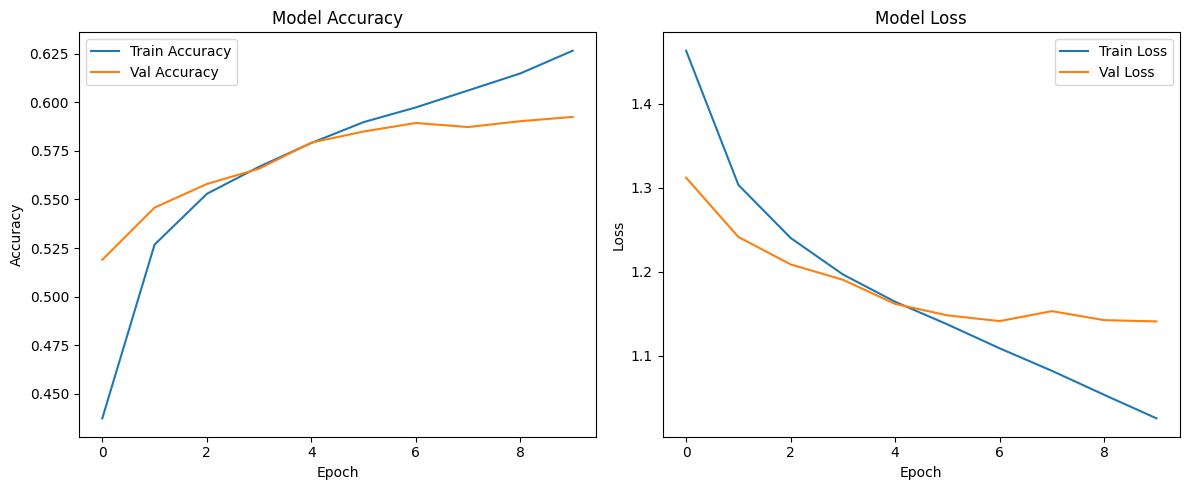

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


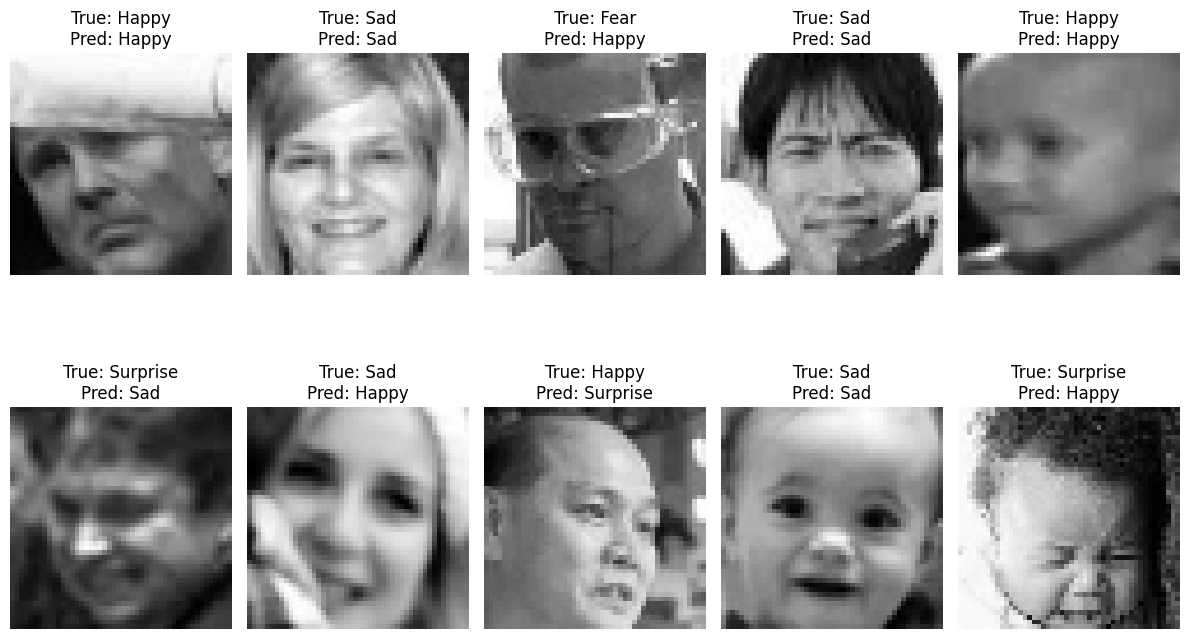

In [ ]:
import numpy as np

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Show 10 sample predictions
class_names = ['Happy', 'Sad', 'Angry', 'Surprise', 'Fear', 'Disgust', 'Neutral', 'Contempt', 'Other1', 'Other2']

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(48, 48), cmap='gray')
    plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def is_lie(row):
    # Convert necessary values to float just in case they are strings
    lie_score = float(row.iloc[3]) + float(row.iloc[5]) + float(row.iloc[7])   # fear, surprise, contempt
    truth_score = float(row.iloc[2]) + float(row.iloc[8]) + float(row.iloc[11])  # happiness, neutral, excitement
    return 1 if lie_score > truth_score else 0

df['lie_label'] = df.apply(is_lie, axis=1)


In [ ]:
print(df.iloc[0])


image        awe_grandmother_214_0.png
bbox                    (0, 0, 48, 48)
0                                    0
1                                    0
2                                    0
3                                    0
4                                    0
5                                    0
6                                   10
7                                    0
8                                    0
9                                    0
label                                6
lie_label                            0
Name: 0, dtype: object


In [ ]:
# Optional: Drop rows where emotion scores are all 0 (if any)
df_filtered = df[(df.iloc[:, 2:12].sum(axis=1)) > 0]

# Now we'll use this dataset
df_filtered = df_filtered[['image', 'lie_label']]


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

image_dir = '/content/ExpwCleaned/ExpwCleaned'
X = []
y = []

for idx, row in tqdm(df_filtered.iterrows(), total=len(df_filtered)):
    img_path = os.path.join(image_dir, row['image'])
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (48, 48))  # Resize to match your model's input
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = img / 255.0  # Normalize
        X.append(img)
        y.append(row['lie_label'])

X = np.array(X).reshape(-1, 48, 48, 1)
y = np.array(y)


100%|██████████| 84830/84830 [00:26<00:00, 3262.63it/s]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5539 - loss: 0.6808 - val_accuracy: 0.6523 - val_loss: 0.6117
Epoch 2/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6565 - loss: 0.6100 - val_accuracy: 0.6704 - val_loss: 0.5902
Epoch 3/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6724 - loss: 0.5890 - val_accuracy: 0.6779 - val_loss: 0.5825
Epoch 4/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6862 - loss: 0.5732 - val_accuracy: 0.6880 - val_loss: 0.5755
Epoch 5/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7005 - loss: 0.5580 - val_accuracy: 0.6904 - val_loss: 0.5676
Epoch 6/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7059 - loss: 0.5472 - val_accuracy: 0.6964 - val_loss: 0.5622
Epoch 7/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7120 - loss: 0.5372 - val_accuracy: 0.6971 - val_loss: 0.5656
Epoch 8/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7186 - loss: 0.530

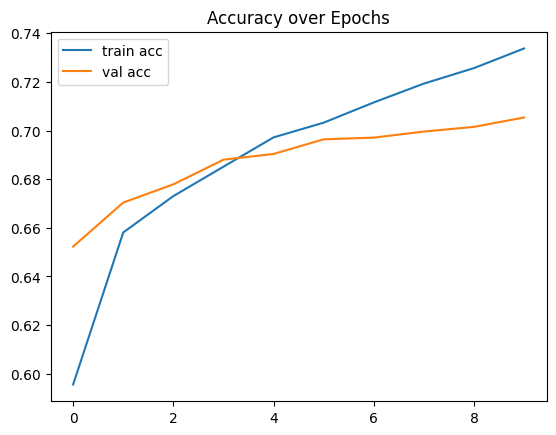

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


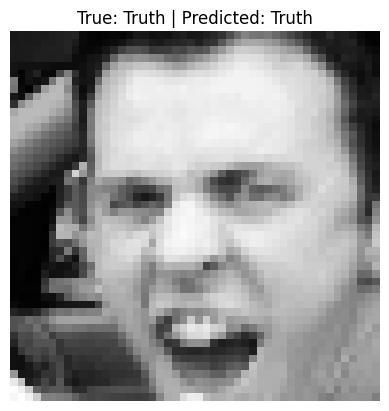

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


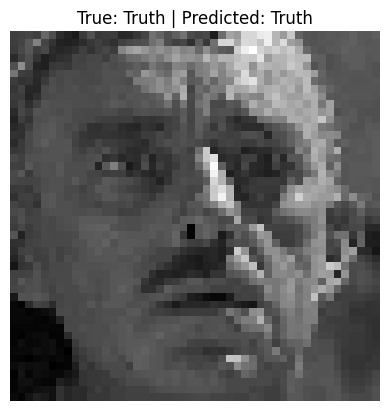

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


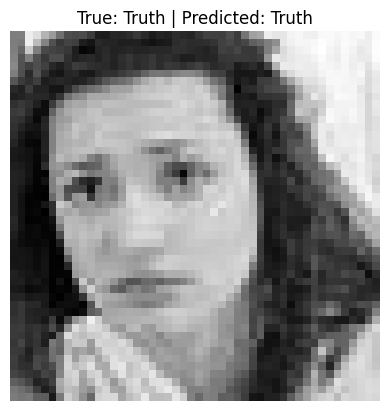

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


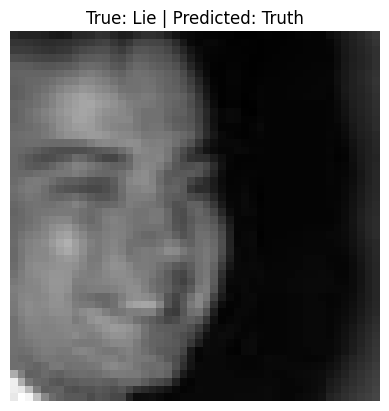

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


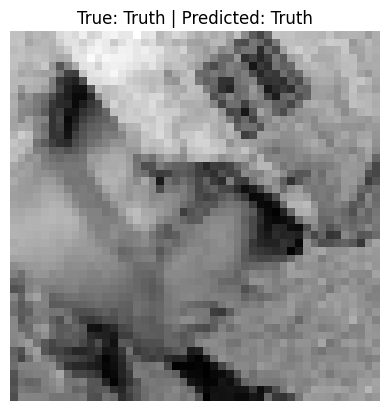

In [ ]:
import random

indices = random.sample(range(len(X_test)), 5)
for idx in indices:
    img = X_test[idx].reshape(48, 48)
    true_label = y_test[idx]
    pred = model.predict(np.expand_dims(X_test[idx], axis=0))[0][0]
    pred_label = 1 if pred > 0.5 else 0

    plt.imshow(img, cmap='gray')
    plt.title(f"True: {'Lie' if true_label else 'Truth'} | Predicted: {'Lie' if pred_label else 'Truth'}")
    plt.axis('off')
    plt.show()


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# 📥 Load Dataset
csv_path = '/content/drive/MyDrive/label_expw.csv'
df = pd.read_csv(csv_path, header=None, quotechar='"')
df.columns = ['image', 'bbox', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# 🏷️ Create Emotion Labels
emotion_columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
df['label'] = df[emotion_columns].astype(int).idxmax(axis=1).astype(str)  # Label as string for Keras
df['image'] = df['image'].str.strip()  # Remove any extra spaces

# 📂 Image Directory
image_dir = '/content/ExpwCleaned/ExpwCleaned'
df['path'] = df['image'].apply(lambda x: os.path.join(image_dir, x))

# 🌀 ImageDataGenerator for Memory-Efficient Loading
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='path',
    y_col='label',
    target_size=(48, 48),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    subset='training',
    shuffle=True,
    seed=42
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='path',
    y_col='label',
    target_size=(48, 48),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    subset='validation',
    shuffle=True,
    seed=42
)

# 🏗️ Build MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False  # Freeze base model initially

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)  # << Corrected to 7 classes

model = Model(inputs=base_model.input, outputs=output)

# 🛠️ Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 📋 Set Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 🏃 Train the New Head
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 🔥 Fine-Tune Base Model
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 🏃 Fine-Tuning Training
history_fine = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 📈 Evaluate Model
test_loss, test_accuracy = model.evaluate(valid_generator)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# 💾 Save the Model
model.save('/content/drive/MyDrive/mobilenet_emotion_model.h5')


Found 67859 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 7 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Found 16964 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 7 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(
<ipython-input-2-852900babf8c>:61: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1061/1061 ━━━━━━━━━━━━━━━━━━━━ 90s 75ms/step - accuracy: 0.5237 - loss: 1.1903 - val_accuracy: 0.0000e+00 - val_loss: 8.8546 - learning_rate: 0.0010
Epoch 2/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.5711 - loss: 1.0351 - val_accuracy: 2.9474e-04 - val_loss: 9.5051 - learning_rate: 0.0010
Epoch 3/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.5817 - loss: 1.0074 - val_accuracy: 5.8948e-05 - val_loss: 11.5126 - learning_rate: 0.0010
Epoch 4/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.5848 - loss: 1.0034 - val_accuracy: 0.0000e+00 - val_loss: 12.9075 - learning_rate: 0.0010
Epoch 5/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.5977 - loss: 0.9743 - val_accuracy: 3.5369e-04 - val_loss: 12.0194 - learning_rate: 2.0000e-04
Epoch 6/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.6079 - loss: 0.9519 - val_accuracy: 7.0738e-04 - val_loss: 12.1914 - learning_rate: 2.0000e-04
Epoch 1/10
1061/1061 ━━━━━━━━━━━━━━━━━━

Test Accuracy: 0.0028, Test Loss: 10.9179
